# PROGRAM 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score






In [4]:
df=pd.read_csv("Credit Card Customer Data.csv")
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [3]:
df.isna().sum()




Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
df=df.drop(['Sl_No','Customer Key'],axis=1)
df





,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


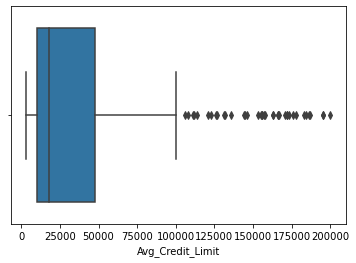

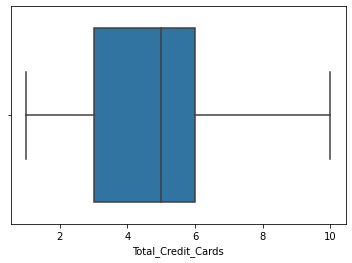

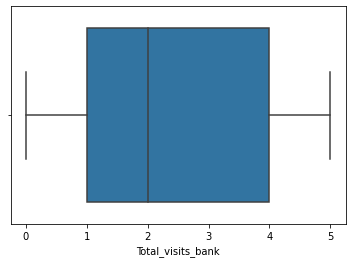

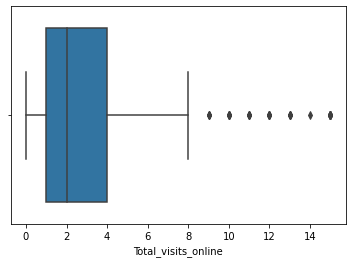

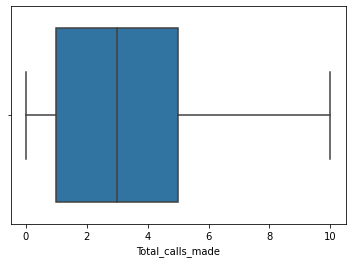

In [6]:
for col in df:
    sns.boxplot(x=col,data=df)
    plt.show()







<AxesSubplot:>

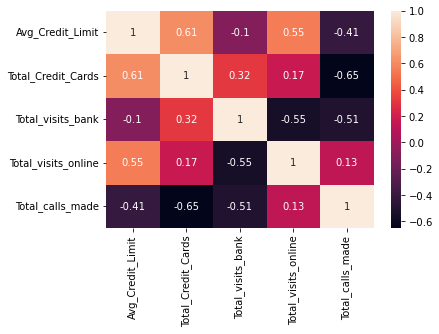

In [7]:
sns.heatmap(data=df.corr(),annot=True)



In [8]:

stnd=StandardScaler()
df.columns
names=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']
df[names]=stnd.fit_transform(df[names])
df




,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


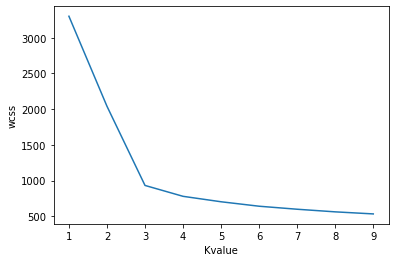

In [10]:
wcss=[]
for i in range(1,10):
    Kmeans = KMeans(n_clusters = i,random_state = 42)
    Kmeans.fit(df)
    Kmeans.inertia_
    wcss.append(Kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.xlabel('Kvalue')
plt.ylabel('wcss')
plt.show()



In [11]:
slh_score=[]
for i in range(2,13):
    kme=KMeans(n_clusters=i)
    kme.fit(df)
    slh_score.append(silhouette_score(df,kme.labels_))
    
print(slh_score)


[0.4184249666322083, 0.5157182558881671, 0.35566706193741826, 0.2726413988287474, 0.25506309059220267, 0.24792558430237924, 0.24250287477977034, 0.22036530251707592, 0.20551995395799014, 0.21196880307031157, 0.20703017416956548]


In [12]:

kme1=KMeans(n_clusters=4)
kme1.fit(df)
x=kme1.predict(df)
x
  


array([3, 0, 3, 3, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,

In [13]:
df["label"]=x
df



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,3
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,3
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,3
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


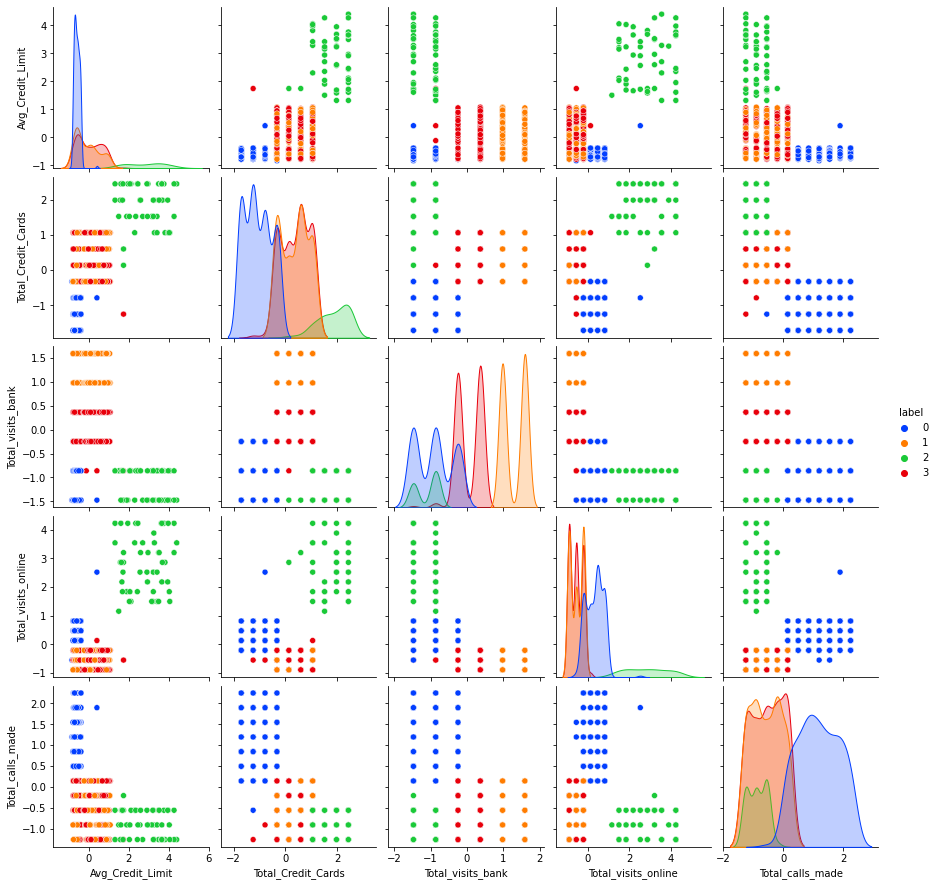

In [23]:

sns.pairplot(df,hue='label',palette='bright')
plt.show()



In [18]:
centroid=kme.cluster_centers_
centroid



array([[ 0.64570368,  0.17014478, -0.01833461, -0.56784133, -0.46438509],
       [ 3.06776829,  1.96218122, -1.15375852,  3.72104358, -0.90227113],
       [-0.60400761, -0.50349924, -0.91941987,  0.29162368,  0.79704348],
       [-0.35395338,  0.8004551 ,  1.33100376, -0.52930891, -0.55766177],
       [-0.58687726, -1.33632657, -1.03402048,  0.3336783 ,  0.35640533],
       [ 2.63072348,  1.77707934, -1.06487734,  2.06599885, -0.85052798],
       [-0.62497902, -1.22259171, -0.32972743,  0.25229024,  1.39482608],
       [ 0.74818421,  0.59733368,  1.03617501, -0.54748969, -0.65649118],
       [-0.30967215, -0.17417362,  1.29863153, -0.54748969, -0.54343595],
       [-0.57382924, -1.14587261, -1.22658803,  0.39377321,  1.85536831],
       [-0.37861976,  0.20988615,  0.09232388, -0.56575165, -1.00829838],
       [-0.35145347,  0.68058016,  0.04438893, -0.56984313, -0.14648188]])

In [20]:
sch_score=silhouette_score(df,kme1.labels_)
sch_score


0.5392195186716479